# == ***Project: Summer Academy NPS Data*** ==


---
---


![Image](nps.png)

# **Imports**
---

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


# **Data**
---

In [35]:
d = pd.read_csv('Student-Feedback-2017.csv')
data = pd.DataFrame(d)
data

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right
...,...,...,...,...,...,...
1448,1495,New York City,"Apps, Explorer",Week 7,10,Just right
1449,1496,New York City,"Apps, Explorer",Week 7,8,Just right
1450,1497,New York City,Apps,Week 7,10,Just right
1451,1498,New York City,"Apps, Explorer",Week 7,1,A little too slow


In [36]:
print(data.columns)

Index(['ID', 'Location', 'Track', 'Week', 'Rating (Num)', 'Schedule Pacing'], dtype='object')


# **Cleaning**
---

## _Renaming_

In [43]:
# rename columns
# ---------------

data = data.rename(columns={"Rating (Num)": "Rating", "Schedule Pacing": "Pace"})
data.head()


,ID,Location,Track,Week,Rating,Pace,NPS Category
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right,Promoter
1,36,Los Angeles,Apps,Week 1,4,A little too fast,Promoter
2,117,San Francisco,Games,Week 1,4,Way too slow,Promoter
3,253,NaN,NaN,Week 2,4,A little too fast,Promoter
4,350,New York City,"Apps, Explorer",Week 1,4,Just right,Promoter


In [56]:
# changing rating datatype
# -------------------------

# data = data[data['Rating'] != '#ERROR!']
# data['Rating'] = data['Rating'].astype(int)
data.dtypes

ID           int64
Location    object
Track       object
Week        object
Rating       int64
Pace        object
dtype: object

## _NPS categories_

In [58]:
def nps_category(rating):
    if rating >= 9:
        return "Promoter"
    elif rating >= 7:
        return "Passive"
    else:
        return "Detractor" 
    
# data["NPS Category"] = data.apply(lambda row: nps_category(row["Rating"]), axis=1)
data.tail()

,ID,Location,Track,Week,Rating,Pace,NPS Category
1448,1495,New York City,"Apps, Explorer",Week 7,10,Just right,Promoter
1449,1496,New York City,"Apps, Explorer",Week 7,8,Just right,Passive
1450,1497,New York City,Apps,Week 7,10,Just right,Promoter
1451,1498,New York City,"Apps, Explorer",Week 7,1,A little too slow,Detractor
1452,1499,New York City,Apps,Week 5,8,Just right,Passive


# **NPS**

NPS = (Promoters - Detractors)  (Promoters + Passives + Detractors)

---

In [65]:
promoters_amt = len(data[data['NPS Category'].dropna() == 'Promoter'])
detractors_amt = len(data[data['NPS Category'].dropna() == 'Detractor'])
passive_amt = len(data[data['NPS Category'].dropna() == 'Passive'])

NPS = (promoters_amt - detractors_amt)/(promoters_amt+detractors_amt+passive_amt) *100
print('NPS is: ', NPS, '%')

NPS is:  44.06896551724138 %


# **Questions**
---

+ How many more promoters are there than detractors across our 2017 data?
    - ...
+ Which track boasts the best promoter-to-detractor ratio?
    - ...
+ Does the student experience get better the longer that they are enrolled at the Summer Academy?
    - It stays about the same
+ Does student satisfaction vary by location?
    - ...

## _How many more promoters are there than detractors across our 2017 data?_


## _Which track boasts the best promoter-to-detractor ratio?_


## _Does the student experience get better the longer that they are enrolled at the Summer Academy?_

In [175]:
def find_average_per_week(data):
    weeks = ['Week 1','Week 2','Week 3','Week 4','Week 5','Week 6','Week 7','Week 8']
    week_averages = []
    for i in weeks:
        data_week = data[data['Week']== i]['Rating']
        average = np.round(np.mean(data_week), 2)
        week_averages.append(average)
    return week_averages

reviews_per_week = dict(data['Week'].value_counts())
average_per_week = find_average_per_week(data)
print("Number of reviews per week: ", reviews_per_week, '\n')
print("Averages Per Week: ", average_per_week)

Number of reviews per week:  {'Week 1': 288, 'Week 2': 276, 'Week 3': 241, 'Week 4': 193, 'Week 5': 179, 'Week 6': 144, 'Week 7': 120, 'Week 8': 9} 

Averages Per Week:  [8.27, 8.35, 8.52, 8.33, 8.44, 8.54, 8.6, 9.11]


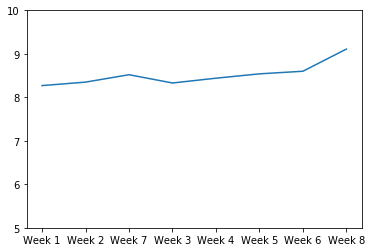

In [155]:
plt.plot(data['Week'].unique(), average_per_week)
axes = plt.gca()
axes.set_ylim([5,10])
plt.show()

## _How many reviews per location?_

{'San Francisco': 360, 'New York City': 330, 'Santa Clara': 201, 'Los Angeles': 106, 'Beijing': 78, 'Chicago': 70, 'Tokyo': 65, 'Redwood City': 58, 'Washington DC': 47, 'Oakland': 47, 'Atlanta': 33, 'Hong Kong': 11}


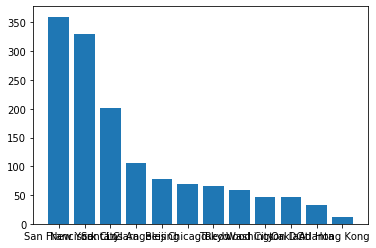

In [119]:
reviews_per_location = dict(data['Location'].value_counts())
print(reviews_per_location)

plt.bar(range(len(reviews_per_location)), list(reviews_per_location.values()), align='center')
plt.xticks(range(len(reviews_per_location)), list(reviews_per_location.keys()))
plt.show()

## _Does student satisfaction vary by location?_


In [171]:
display(pd.crosstab(data['Location'], data['Rating']) )

Rating,0,1,2,3,4,5,6,7,8,9,10
Location,,,,,,,,,,,
Atlanta,0,0,0,0,0,0,0,1,8,10,14
Beijing,0,0,0,0,0,0,0,6,19,26,27
Chicago,0,0,0,0,0,0,4,12,17,20,17
Hong Kong,0,0,0,0,0,1,2,3,4,1,0
Los Angeles,0,0,0,0,1,1,3,8,25,33,35
New York City,1,2,1,3,3,9,16,38,98,75,84
Oakland,0,0,0,0,0,1,1,9,9,15,12
Redwood City,0,0,0,0,0,3,2,10,13,18,12
San Francisco,0,0,1,4,3,6,17,40,95,93,101


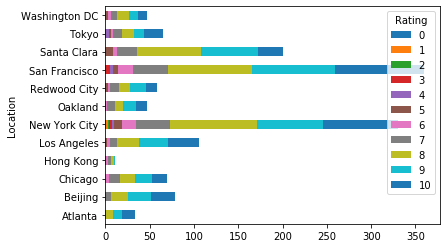

In [172]:
data.groupby(['Location'])['Rating'].value_counts().unstack().plot(kind='barh',stacked=True)


# **Visuals**
---

## _NPS Category Amounts_

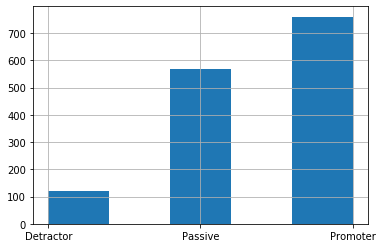

In [72]:
# chart of percentages of NPS categories

data['NPS Category'].hist(bins=5)

## _Percentage of each Rating_

In [86]:
fig = px.pie(data, values=data['Rating'], names=data['Rating'], title='Percentage of Rating')
fig.show()

![image](pie.png)

In [93]:
data['Rating'].value_counts()

8     392
9     384
10    376
7     177
6      59
5      35
4      13
3       8
2       2
1       2
0       2
Name: Rating, dtype: int64

In [98]:
len(data[data['Rating']==8]) / len(data['Rating'])

0.27034482758620687

## _Count of each Rating_

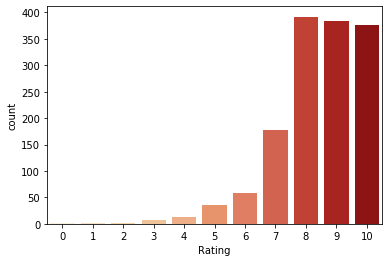

In [109]:

# Bar Chart Example #1 (Simple): Categorical Variables Showing Counts
sns.countplot(x="Rating", palette="OrRd", data=data)
